# Capstone 3: Customer Feedback NLP

## EDA

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
import re
import string
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
data=pd.read_csv('/Users/jenniferrobbins/Downloads/sentiment-analysis.csv')
data.head()

,"Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score"
0,"""I love this product!"", Positive, Twitter, 202..."
1,"""The service was terrible."", Negative, Yelp Re..."
2,"""This movie is amazing!"", Positive, IMDb, 2023..."
3,"""I'm so disappointed with their customer suppo..."
4,"""Just had the best meal of my life!"", Positive..."


In [8]:
#separating the data into columns
data=data['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'].str.split(',', expand=True)
data.columns=['Text', 'Sentiment', 'Source', 'Date/Time', 'User ID', 'Location', 'Confidence Score']

In [9]:
print('There are {} rows and {} columns in data.'.format(data.shape[0], data.shape[1]))

There are 98 rows and 7 columns in data.


In [10]:
data.head(10)

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score
0,"""I love this product!""",Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85
1,"""The service was terrible.""",Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65
2,"""This movie is amazing!""",Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92
3,"""I'm so disappointed with their customer suppo...",Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78
4,"""Just had the best meal of my life!""",Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88
5,"""The quality of this product is subpar.""",Negative,Amazon Reviews,2023-06-16 10:15:27,shopper123,San Francisco,0.72
6,"""I can't stop listening to this song. It's inc...",Positive,Spotify,2023-06-16 13:40:18,musiclover456,Berlin,0.91
7,"""Their website is so user-friendly. Love it!""",Positive,Website Testimonial,2023-06-16 16:05:36,testimonialuser1,Sydney,0.87
8,"""I loved the movie! It was fantastic!""",Positive,IMDb,2023-07-02 09:12:34,user123,New York,0.92
9,"""The customer service was terrible.""",Negative,Yelp Reviews,2023-07-02 10:45:21,user456,Los Angeles,0.65


In [11]:
data.isnull().sum()

Text                2
Sentiment           2
Source              2
Date/Time           2
User ID             2
Location            2
Confidence Score    2
dtype: int64

In [12]:
data.dropna(inplace=True)

In [13]:
data.head(10)

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score
0,"""I love this product!""",Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85
1,"""The service was terrible.""",Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65
2,"""This movie is amazing!""",Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92
3,"""I'm so disappointed with their customer suppo...",Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78
4,"""Just had the best meal of my life!""",Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88
5,"""The quality of this product is subpar.""",Negative,Amazon Reviews,2023-06-16 10:15:27,shopper123,San Francisco,0.72
6,"""I can't stop listening to this song. It's inc...",Positive,Spotify,2023-06-16 13:40:18,musiclover456,Berlin,0.91
7,"""Their website is so user-friendly. Love it!""",Positive,Website Testimonial,2023-06-16 16:05:36,testimonialuser1,Sydney,0.87
8,"""I loved the movie! It was fantastic!""",Positive,IMDb,2023-07-02 09:12:34,user123,New York,0.92
9,"""The customer service was terrible.""",Negative,Yelp Reviews,2023-07-02 10:45:21,user456,Los Angeles,0.65


In [14]:
#there are some leading and trailing spaces in 'Date/Time' column
data['Date/Time'] = data['Date/Time'].str.strip()

data[['Date', 'Time']] = data['Date/Time'].str.split(' ', expand=True)

data.drop(columns=['Date/Time'], inplace=True)

In [15]:
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time

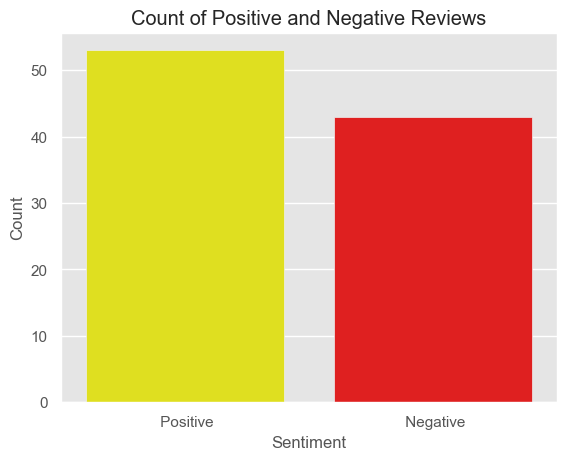

In [18]:
sns.countplot(x='Sentiment', data=data, palette= ['yellow', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count of Positive and Negative Reviews')
plt.show()

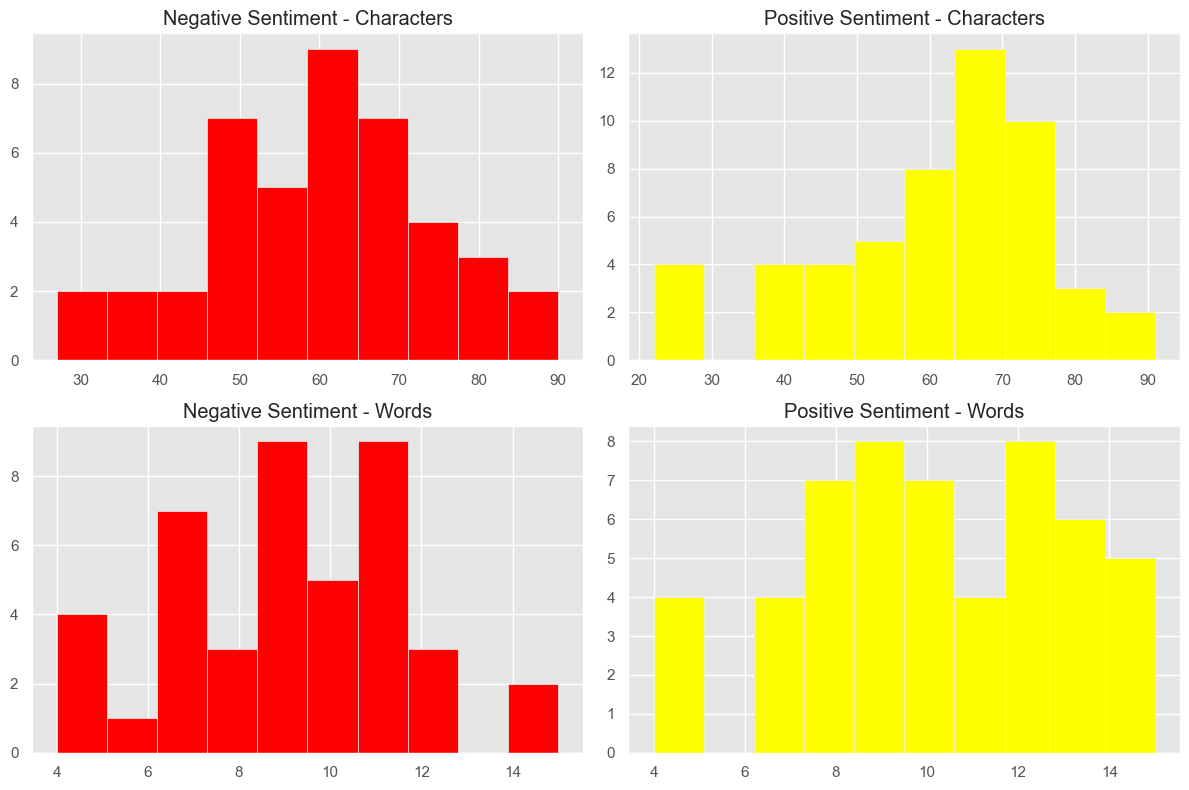

In [20]:
data['Sentiment'] = data['Sentiment'].str.strip()
data['Sentiment'] = data['Sentiment'].str.lower()


fig, axes = plt.subplots(2, 2, figsize=(12, 8))

review_length_negative = data[data['Sentiment'] == 'negative']['Text'].str.len()
axes[0, 0].hist(review_length_negative, color='red')
axes[0, 0].set_title("Negative Sentiment - Characters")

review_length_positive = data[data['Sentiment'] == 'positive']['Text'].str.len()
axes[0, 1].hist(review_length_positive, color='yellow')
axes[0, 1].set_title("Positive Sentiment - Characters")

review_length_negative_words = data[data['Sentiment'] == 'negative']['Text'].str.split().map(lambda x: len(x))
axes[1, 0].hist(review_length_negative_words, color='red')
axes[1, 0].set_title("Negative Sentiment - Words")

review_length_positive_words = data[data['Sentiment'] == 'positive']['Text'].str.split().map(lambda x: len(x))
axes[1, 1].hist(review_length_positive_words, color='yellow')
axes[1, 1].set_title("Positive Sentiment - Words")

plt.tight_layout()

plt.show()

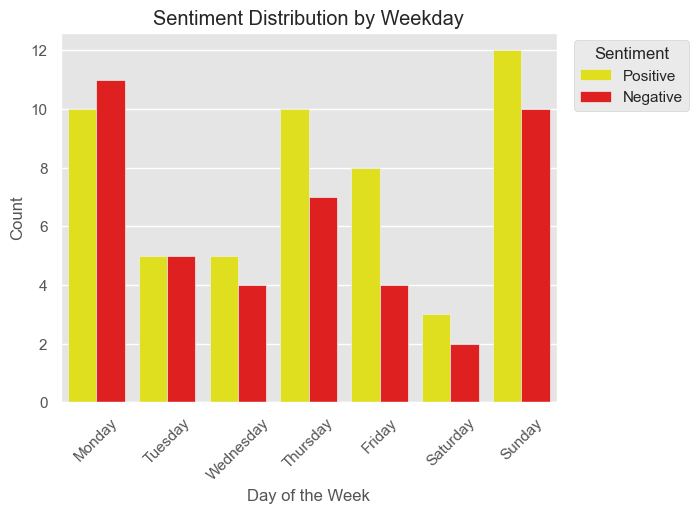

In [21]:
data['DayOfWeek'] = data['Date'].dt.day_name()
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['DayOfWeek'] = pd.Categorical(data['DayOfWeek'], categories=custom_order, ordered=True)

sns.countplot(x='DayOfWeek', hue='Sentiment', data=data, palette= ['yellow', 'red'])

plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Sentiment Distribution by Weekday')
plt.legend(title='Sentiment', labels=['Positive', 'Negative'], bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

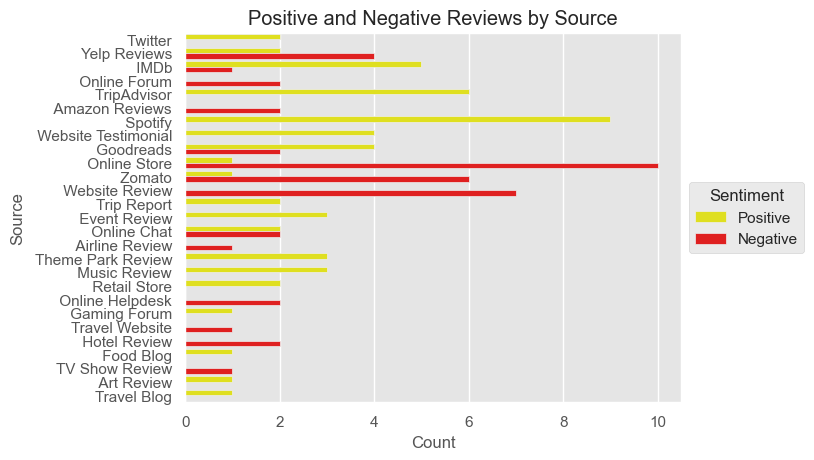

In [22]:
sns.countplot(y='Source', hue='Sentiment', data=data, palette=['yellow', 'red'])
plt.xlabel('Count')
plt.ylabel('Source')
plt.title('Positive and Negative Reviews by Source')
plt.legend(title='Sentiment', loc='center left', bbox_to_anchor=(1, 0.5), labels=['Positive', 'Negative'])
plt.show()

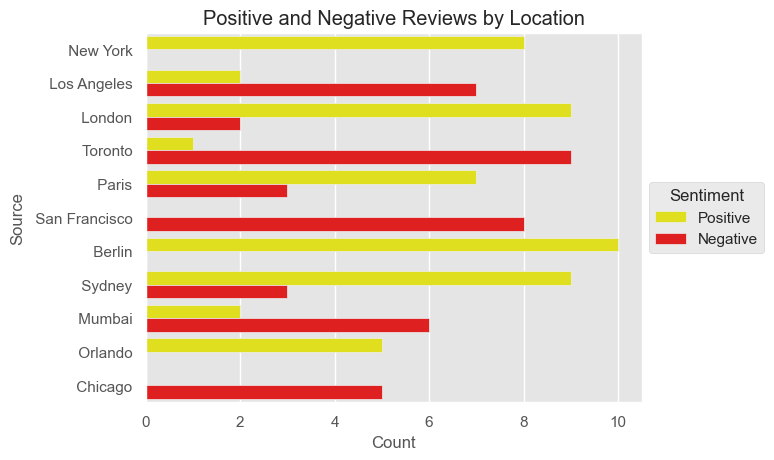

In [23]:
sns.countplot(y='Location', hue='Sentiment', data=data, palette=['yellow', 'red'])
plt.xlabel('Count')
plt.ylabel('Source')
plt.title('Positive and Negative Reviews by Location')
plt.legend(title='Sentiment', loc='center left', bbox_to_anchor=(1, 0.5), labels=['Positive', 'Negative'])
plt.show()

In [24]:
data.describe()

,Text,Sentiment,Source,User ID,Location,Confidence Score,Date,Time,DayOfWeek
count,96,96,96,96,96,96,96,96,96
unique,75,2,27,73,11,25,16,54,7
top,"""I love this product!""",positive,Online Store,user456,Sydney,0.92,2023-07-02 00:00:00,11:45:32,Sunday
freq,2,53,11,4,12,9,12,4,22
first,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-15 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-17 00:00:00,NaN,NaN


In [25]:
data['User ID'] = data['User ID'].str.strip()

user_reviews = data.groupby('User ID').agg(
    ReviewCount=('Text', 'count'),
    SentimentDistribution=('Sentiment', lambda x: dict(x.value_counts()))
).reset_index()

user_reviews = user_reviews[user_reviews['ReviewCount'] >= 2]

sentiment_data = pd.DataFrame(user_reviews['SentimentDistribution'].to_list())
sentiment_data.index = user_reviews['User ID']
sentiment_data

,positive,negative
User ID,,
@user123,2.0,NaN
bookworm789,2.0,NaN
foodie22,2.0,NaN
foodlover123,NaN,2.0
foodlover2468,NaN,2.0
forumuser1,NaN,2.0
moviefan789,2.0,NaN
musiclover456,2.0,NaN
musiclover789,2.0,NaN


In [26]:
data[data['User ID'] == 'user456'][['Text', 'Source']]

,Text,Source
1,"""The service was terrible.""",Yelp Reviews
9,"""The customer service was terrible.""",Yelp Reviews
80,"""The service was terrible.""",Yelp Reviews
88,"""The customer service was terrible.""",Yelp Reviews


In [27]:
def create_corpus(sentiment):
    corpus=[]
    for x in data[data['Sentiment']==sentiment]['Text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

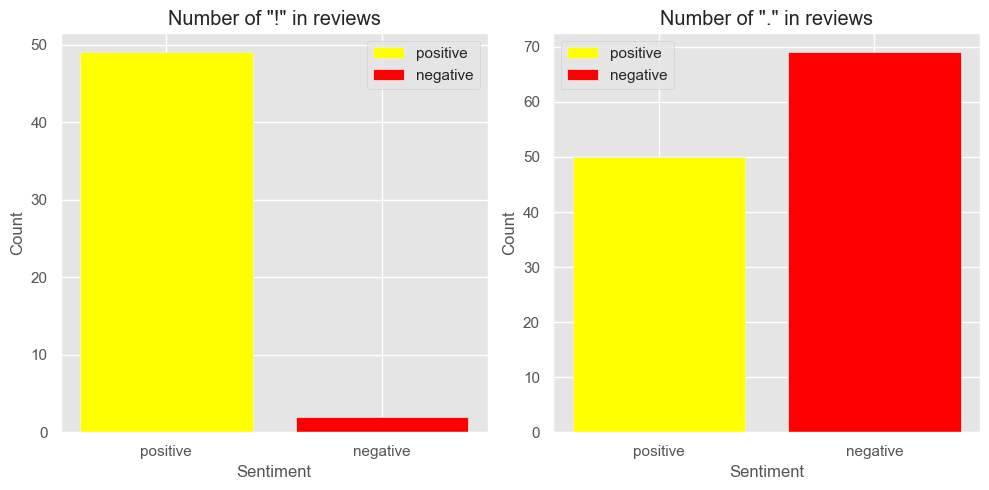

In [28]:
def count_punctuation_marks(sentiment, punctuation):
    count = 0
    for text in data[data['Sentiment'] == sentiment]['Text']:
        count += text.count(punctuation)
    return count

def plot_punctuation_counts():
    punctuations = ['!', '.']
    sentiments = ['positive', 'negative']
    colors = ['yellow', 'red']

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    for idx, punctuation in enumerate(punctuations):
        for sentiment, color in zip(sentiments, colors):
            count = count_punctuation_marks(sentiment, punctuation)
            axes[idx].bar(sentiment, count, color=color)
        
        axes[idx].set_xlabel('Sentiment')
        axes[idx].set_ylabel('Count')
        axes[idx].set_title(f'Number of "{punctuation}" in reviews')
        axes[idx].legend(sentiments)

    plt.tight_layout()

plot_punctuation_counts()
plt.show()


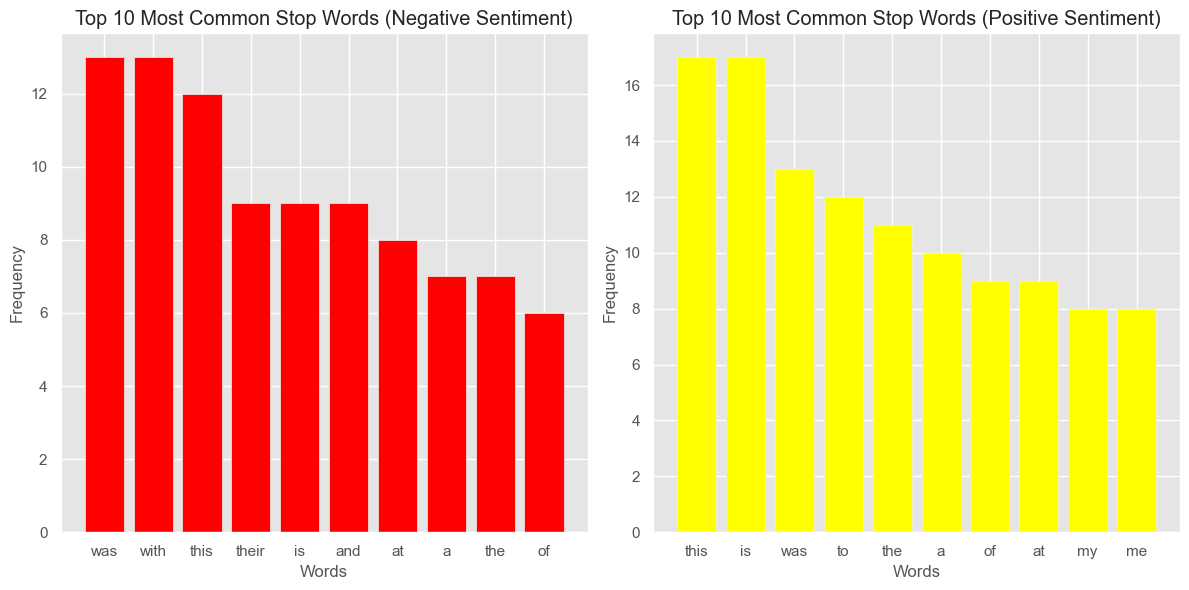

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

corpus_negative = create_corpus('negative')
dic_negative = defaultdict(int)
for word in corpus_negative:
    if word in stop:
        dic_negative[word] += 1
top_negative = sorted(dic_negative.items(), key=lambda x: x[1], reverse=True)[:10]
x_neg, y_neg = zip(*top_negative)
axes[0].bar(x_neg, y_neg, color='red')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Top 10 Most Common Stop Words (Negative Sentiment)')

corpus_positive = create_corpus('positive')
dic_positive = defaultdict(int)
for word in corpus_positive:
    if word in stop:
        dic_positive[word] += 1
top_positive = sorted(dic_positive.items(), key=lambda x: x[1], reverse=True)[:10]
x_pos, y_pos = zip(*top_positive)
axes[1].bar(x_pos, y_pos, color='yellow')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Top 10 Most Common Stop Words (Positive Sentiment)')

plt.tight_layout()
plt.show()

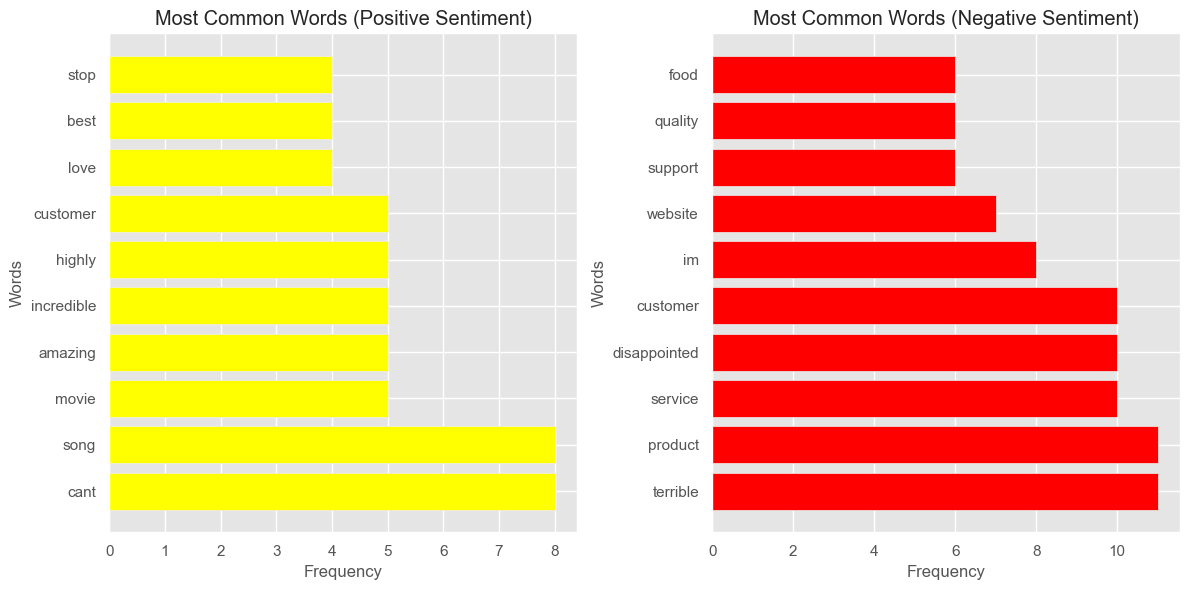

In [31]:
data['Text'] = data['Text'].str.strip('"')
def plot_most_common_words(corpus, sentiment, color):
    data['Text'] = data['Text'].str.replace(r'[{}]'.format(string.punctuation), '')
    word_freq = defaultdict(int)
    special_chars = string.punctuation
    for word in corpus:
        word = word.lower()  
        if word not in stop and word not in special_chars:
            word_freq[word] += 1

    top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]
    x, y = zip(*top_words)

    plt.barh(x, y, color=color)  
    plt.ylabel('Words')          
    plt.xlabel('Frequency')      
    plt.title(f'Most Common Words ({sentiment.capitalize()} Sentiment)')

corpus_positive = create_corpus('positive')
plt.subplot(1, 2, 1)
plot_most_common_words(corpus_positive, 'positive', 'yellow')

corpus_negative = create_corpus('negative')
plt.subplot(1, 2, 2)
plot_most_common_words(corpus_negative, 'negative', 'red')
plt.subplots_adjust(wspace=0.5)  

plt.gcf().set_size_inches(12, 6)
plt.tight_layout()
plt.show()